In [561]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import emoji
from datasets import load_metric
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [562]:
train_df = pd.read_csv("predictions/train_pred_df.csv")
train_df = train_df.dropna().reset_index(drop=True)
train_df

,tweet,sarcastic,pred
0,just wondering how to get my diss down by 1500...,1,1
1,my professor has been fighting with his dog mo...,0,0
2,"Well done Henri, cost us the win #nffc",1,0
3,Literally don’t fucking talk to me unless you ...,0,1
4,What a horrible day 😔,0,0
...,...,...,...
2769,On a scale from 1 to 10 how deeply was your ch...,1,1
2770,If you get a automatic car do you have to do ...,0,1
2771,i found out about a cat antique shop in wichit...,0,0
2772,"If I invite you over for dinner, it’s my inten...",0,0


In [563]:
df = pd.read_csv("predictions/valid_pred_df.csv")
df = df.dropna().reset_index(drop=True)
df

,tweet,sarcastic,pred
0,crying in the krispy kreme parking lot cause t...,0,0
1,The views on this hike were fantastic... at le...,0,0
2,I really feel bad for all the pups this time o...,0,0
3,help why do i keep having nightmares about bei...,0,1
4,"This isn’t good, only a few days in of self is...",0,0
...,...,...,...
688,Hate people who moan about EVERY SINGLE THING ...,0,1
689,Oh my god this is so satisfying to watch. Look...,0,1
690,going to class! https://t.co/VgCWGl9YTG,0,0
691,Seriously thank God tomorrow's friday #needabreak,0,0


#### F1 score

In [564]:
f1_metric = load_metric("f1")
f1_metric.compute(predictions=train_df.sarcastic.values, references=train_df.pred.values)

Checking /home/ray080186/.cache/huggingface/datasets/9cf48e7430b438f6a92431a6dc5771d7cb22009fd56adce93f161414e4cd5345.3c9109dd58bcb3f88630a98de3b68825179bc84d0ae17a5f5ebc137fd0e7310e.py for additional imports.
Found main folder for metric https://s3.amazonaws.com/datasets.huggingface.co/datasets/metrics/f1/f1.py at /home/ray080186/.cache/huggingface/modules/datasets_modules/metrics/f1
Found specific version folder for metric https://s3.amazonaws.com/datasets.huggingface.co/datasets/metrics/f1/f1.py at /home/ray080186/.cache/huggingface/modules/datasets_modules/metrics/f1/9266b41af9f54f6ec149196b308e3c691a7da9e97256b7e926b564bfedfe3599
Found script file from https://s3.amazonaws.com/datasets.huggingface.co/datasets/metrics/f1/f1.py to /home/ray080186/.cache/huggingface/modules/datasets_modules/metrics/f1/9266b41af9f54f6ec149196b308e3c691a7da9e97256b7e926b564bfedfe3599/f1.py
Couldn't find dataset infos file at https://s3.amazonaws.com/datasets.huggingface.co/datasets/metrics/f1/dataset_i

{'f1': 0.6461538461538462}

In [565]:
f1_metric = load_metric("f1")
f1_metric.compute(predictions=df.sarcastic.values, references=df.pred.values)

Checking /home/ray080186/.cache/huggingface/datasets/9cf48e7430b438f6a92431a6dc5771d7cb22009fd56adce93f161414e4cd5345.3c9109dd58bcb3f88630a98de3b68825179bc84d0ae17a5f5ebc137fd0e7310e.py for additional imports.
Found main folder for metric https://s3.amazonaws.com/datasets.huggingface.co/datasets/metrics/f1/f1.py at /home/ray080186/.cache/huggingface/modules/datasets_modules/metrics/f1
Found specific version folder for metric https://s3.amazonaws.com/datasets.huggingface.co/datasets/metrics/f1/f1.py at /home/ray080186/.cache/huggingface/modules/datasets_modules/metrics/f1/9266b41af9f54f6ec149196b308e3c691a7da9e97256b7e926b564bfedfe3599
Found script file from https://s3.amazonaws.com/datasets.huggingface.co/datasets/metrics/f1/f1.py to /home/ray080186/.cache/huggingface/modules/datasets_modules/metrics/f1/9266b41af9f54f6ec149196b308e3c691a7da9e97256b7e926b564bfedfe3599/f1.py
Couldn't find dataset infos file at https://s3.amazonaws.com/datasets.huggingface.co/datasets/metrics/f1/dataset_i

{'f1': 0.44539614561027835}

#### Summary

In [566]:
train_df.groupby(by="sarcastic")["sarcastic"].apply(lambda x: x.count()/len(train_df))

sarcastic
0    0.754867
1    0.245133
Name: sarcastic, dtype: float64

In [567]:
train_df.groupby(by="pred")["pred"].apply(lambda x: x.count()/len(train_df))

pred
0    0.635905
1    0.364095
Name: pred, dtype: float64

In [568]:
df.groupby(by="sarcastic")["sarcastic"].apply(lambda x: x.count()/len(df))

sarcastic
0    0.730159
1    0.269841
Name: sarcastic, dtype: float64

In [569]:
df.groupby(by="pred")["pred"].apply(lambda x: x.count()/len(df))

pred
0    0.59596
1    0.40404
Name: pred, dtype: float64

In [570]:
train_df["type"] = "TP"
train_df.loc[(train_df["sarcastic"]==0) & (train_df["pred"]==0), "type"] = "TN"
train_df.loc[(train_df["sarcastic"]==1) & (train_df["pred"]==0), "type"] = "FN"
train_df.loc[(train_df["sarcastic"]==0) & (train_df["pred"]==1), "type"] = "FP"

In [571]:
len(train_df[train_df["type"]=="FP"]) / len(train_df[train_df["type"].isin(["TN", "FP"])])

0.22158548233046801

In [572]:
len(train_df[train_df["type"]=="FN"]) / len(train_df[train_df["type"].isin(["FN", "TP"])])

0.19705882352941176

In [576]:
df["type"] = "TP"
df.loc[(df["sarcastic"]==0) & (df["pred"]==0), "type"] = "TN"
df.loc[(df["sarcastic"]==1) & (df["pred"]==0), "type"] = "FN"
df.loc[(df["sarcastic"]==0) & (df["pred"]==1), "type"] = "FP"

In [577]:
len(df[df["type"]=="FP"]) / len(df[df["type"].isin(["TN", "FP"])])

0.34782608695652173

In [578]:
len(df[df["type"]=="FN"]) / len(df[df["type"].isin(["FN", "TP"])])

0.44385026737967914

#### TF-IDF

In [310]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = "@user" if t.startswith("@") and len(t) > 1 else t
        t = "http" if t.startswith("http") else t
        new_text.append(t)
    return " ".join(new_text)

In [329]:
tfidf = TfidfVectorizer(min_df=2, stop_words="english")
X_train = train_df["tweet"].apply(preprocess).tolist()
X_val = df["tweet"].apply(preprocess).tolist()

tfidf.fit(X_val+X_train)
X_train = tfidf.transform(X_train)
X_val = tfidf.transform(X_val)

print(X_train.shape)
print(X_val.shape)

sim = X_val.dot(X_train.transpose()).toarray()
print(sim.shape)

(2774, 3549)
(693, 3549)
(693, 2774)


In [341]:
k = 1
sim_idx_topk = sim.argsort()[:, -k:]
sim_val_topk = np.array([sim[i][j] for i, j in enumerate(sim_idx_topk)])

In [401]:
result = pd.DataFrame(columns=[
    "text_val", "true_val", "pred_val", "text_train", "true_train", "pred_train", "similarity"
])
for i in range(sim.shape[0]):
    j = sim_idx_topk[i]
    new_row = pd.DataFrame({
        "text_val": [df["tweet"][i]],
        "true_val": [df["sarcastic"][i]],
        "pred_val": [df["pred"][i]],
        "text_train": [train_df["tweet"].values[j][0]],
        "true_train": [train_df["sarcastic"].values[j][0]],
        "pred_train": [train_df["pred"].values[j][0]],
        "similarity": [sim_val_topk[i][0]]
    })
    result = result.append(new_row)
result = result.sort_values("similarity", ascending=False).reset_index(drop=True)

In [418]:
result.loc[[17, 24]] 

,text_val,true_val,pred_val,text_train,true_train,pred_train,similarity
17,"Don’t let anyone ruin your day, it’s YOUR day....",0,1,Anyone else wanna ruin me day x,1,1,0.762390
24,Shout out James Boswell #unibowl,1,0,Shout-out to whoever invented watermelons.,0,0,0.723052


In [580]:
result.loc[[17]] ["text_val"].values

array(['Don’t let anyone ruin your day, it’s YOUR day. Ruin it yourself'],
      dtype=object)

#### emoji

In [522]:
def extract_emojis(s):
    return " ".join([c for c in s if c in emoji.UNICODE_EMOJI['en']])

In [523]:
train_df["emojis"] = [extract_emojis(s) for s in train_df["tweet"]]
df["emojis"] = [extract_emojis(s) for s in df["tweet"]]

,tweet,sarcastic,pred,emojis
4,What a horrible day 😔,0,0,😔
6,Whenever I text Scott in the middle of the nig...,0,0,🤗
12,cant believe im missing silvacre kiss bcos of ...,0,0,😭
13,NOT EVERYONE but most of the people I’ve encou...,0,0,🙃
14,I would do so much for people that would do ab...,1,1,😀
...,...,...,...,...
2753,Johnson &amp; Johnson really be tryna kill you...,0,1,😬 🥴 😂 🤦 🏽 ♀
2757,but clinton's emails!\noh.\nemm.\nfucking.\nge...,1,1,🤮
2759,One positive of the dark mornings is you can w...,0,0,🤗 🤗 🤗
2761,"Love the people in my life, no matter what I g...",0,0,❤


In [554]:
tfidf = TfidfVectorizer(min_df=2, stop_words="english")
X_train = train_df[train_df["emojis"] != ""]["emojis"].apply(lambda x: emoji.demojize(x)).tolist()
X_test = df[df["emojis"] != ""]["emojis"].apply(lambda x: emoji.demojize(x)).tolist()

tfidf.fit(X_test+X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)
y_train = train_df[train_df["emojis"] != ""]["sarcastic"].values
y_test = df[df["emojis"] != ""]["sarcastic"].values

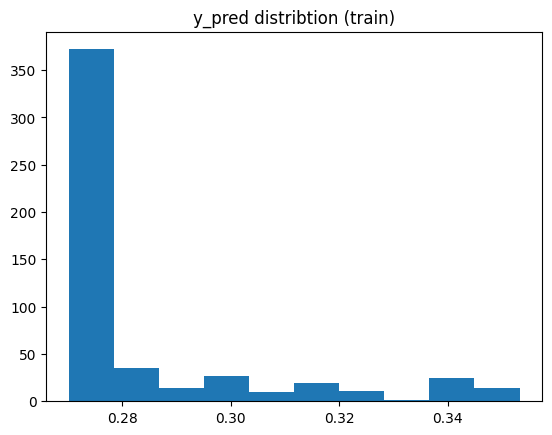

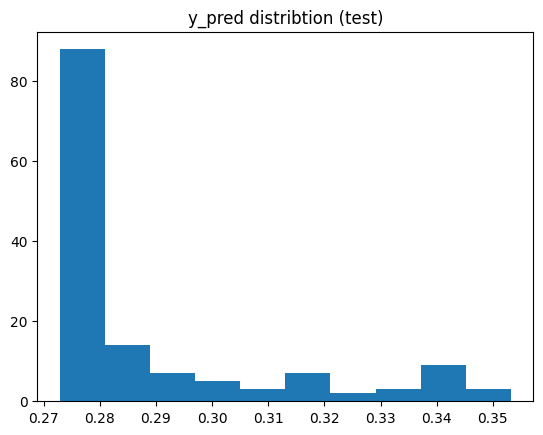

Done writing 528 examples in 4224 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.
Done writing 141 examples in 1128 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.


Train f1: 0.295
Test f1: 0.267


In [556]:
thd = 0.33
clf = SVC(probability=True, random_state=0)
clf.fit(X_train, y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
plt.hist(y_pred_train)
plt.title("y_pred distribtion (train)")
plt.show()
y_pred_test = clf.predict_proba(X_test)[:,1]
plt.title("y_pred distribtion (test)")
plt.hist(y_pred_test)
plt.show()

y_pred_train = y_pred_train > thd
y_pred_test = y_pred_test > thd
train_f1 = f1_metric.compute(predictions=y_pred_train, references=y_train)["f1"]
test_f1 = f1_metric.compute(predictions=y_pred_test, references=y_test)["f1"]
print("Train f1:", round(train_f1, 3))
print("Test f1:", round(test_f1, 3))

In [559]:
y_pred_test = np.ones(len(y_pred_test))
test_f1 = f1_metric.compute(predictions=y_pred_test, references=y_test)["f1"]
print("Test f1:", round(test_f1, 3))

Done writing 141 examples in 1128 bytes /home/ray080186/.cache/huggingface/metrics/f1/default/default_experiment-1-0.arrow.
Set __getitem__(key) output type to python objects for no columns  (when key is int or slice) and don't output other (un-formatted) columns.


Test f1: 0.484
